In [ ]:
import pandas as pd

# D·ªØ li·ªáu nh√¢n vi√™n
data = {
    "Employee_ID": ["E001", "E002", "E003", "E004", "E005", "E006", "E007", "E008", "E009", "E010",
                    "E011", "E012", "E013", "E014", "E015", "E016", "E017", "E018", "E019", "E020"],
    "Department": ["Sales", "IT", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR", "Sales",
                   "IT", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR", "Sales", "IT"],
    "Performance": [88, None, 75, 92, 68, 85, None, 79, 90, 73, 86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    "Hours_Worked": [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 46, 38, 43, None, 39, 41, 45, 37, None, 44],
    "Training_Hours": [5, 3,None, 6, 4, 5, 3, 4, None, 5, 2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    "Gender": ["Male", "Female", "Male", "Female", None, "Male", "Female", "Male", "Female", "Male",
               "Female", "Male", "Female", "Male", None, "Female", "Male", "Female", "Male", "Female"],
    "Location": ["Site_A", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C",
                 "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B", "Site_A", "Site_C", "Site_B"]
}

# T·∫°o DataFrame
df = pd.DataFrame(data)




In [ ]:
#C√¢u 1
# T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm gi√° tr·ªã thi·∫øu
missing_percentage = df.isnull().mean() * 100

# In k·∫øt qu·∫£
print(missing_percentage)

Vi·ªác s·ª≠ d·ª•ng quy tr√¨nh thu th·∫≠p d·ªØ li·ªáu ƒëi·ªán t·ª≠, t·ª± ƒë·ªông h√≥a qua h·ªá th·ªëng qu·∫£n l√Ω, v√† ki·ªÉm tra ƒë·ªãnh k·ª≥ t·ª´ HR s·∫Ω gi√∫p c√¥ng ty gi·∫£m thi·ªÉu d·ªØ li·ªáu thi·∫øu trong t∆∞∆°ng lai.
M·ªói ph√≤ng ban c√≥ ƒë·∫∑c ƒëi·ªÉm c√¥ng vi·ªác kh√°c nhau, n√™n c·∫ßn c√° nh√¢n h√≥a gi·∫£i ph√°p ƒë·ªÉ ph√π h·ª£p v√† hi·ªáu qu·∫£ nh·∫•t.

In [ ]:
#C√¢u 2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Performance'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title("Performance Before Filling")

# ƒêi·ªÅn gi√° tr·ªã thi·∫øu b·∫±ng trung b√¨nh theo Department
df["Performance_DepartmentFilled"] = df["Performance"].copy()
df["Performance_DepartmentFilled"] = df.groupby("Department")["Performance_DepartmentFilled"].transform(lambda x: x.fillna(x.mean()))

# Histogram sau khi ƒëi·ªÅn theo Department
plt.subplot(1, 2, 2)
plt.hist(df["Performance_DepartmentFilled"], bins=10, color='salmon', edgecolor='black')
plt.title("Performance After Department Fill")
plt.tight_layout()
plt.show()

# Ph∆∞∆°ng ph√°p kh√°c: ƒëi·ªÅn theo Location th·ªß c√¥ng (kh√¥ng d√πng th∆∞ vi·ªán t·ª± ƒë·ªông)
df["Performance_LocationFilled"] = df["Performance"].copy()
for location in df["Location"].unique():
    avg_perf = df.loc[(df["Location"] == location) & (df["Performance"].notnull()), "Performance"].mean()
    df.loc[(df["Location"] == location) & (df["Performance"].isnull()), "Performance_LocationFilled"] = avg_perf

C√¢u 2 
 Bi·ªÉu ƒë·ªì histogram th·ªÉ hi·ªán: ph∆∞∆°ng ph√°p theo Location ph·∫£n √°nh ph√¢n ph·ªëi g·∫ßn v·ªõi th·ª±c t·∫ø h∆°n so v·ªõi c√°ch d√πng Department v√¨ n√≥ b√°m s√°t ƒë·∫∑c ƒëi·ªÉm ƒë·ªãa ph∆∞∆°ng t·ª´ng chi nh√°nh.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# C√¢u 3: ƒê·ªô l·ªách chu·∫©n v√† trung v·ªã Hours_Worked
std_hours = np.nanstd(df["Hours_Worked"])
median_hours = np.nanmedian(df["Hours_Worked"])
print(f"ƒê·ªô l·ªách chu·∫©n s·ªë gi·ªù l√†m vi·ªác: {std_hours:.2f} gi·ªù")
print(f"Trung v·ªã s·ªë gi·ªù l√†m vi·ªác: {median_hours} gi·ªù")

# ƒê·ªÅ xu·∫•t ch√≠nh s√°ch qu·∫£n l√Ω th·ªùi gian
print("=> ƒê·ªÅ xu·∫•t: Thi·∫øt l·∫≠p gi·ªõi h·∫°n th·ªùi gian l√†m vi·ªác t·ª´ kho·∫£ng 38 ƒë·∫øn 44 gi·ªù m·ªói tu·∫ßn (¬±1 ƒë·ªô l·ªách chu·∫©n).")


ƒê·ªô l·ªách chu·∫©n s·ªë gi·ªù l√†m vi·ªác: 2.87 gi·ªù
Trung v·ªã s·ªë gi·ªù l√†m vi·ªác: 41.0 gi·ªù
=> ƒê·ªÅ xu·∫•t: Thi·∫øt l·∫≠p gi·ªõi h·∫°n th·ªùi gian l√†m vi·ªác t·ª´ kho·∫£ng 38 ƒë·∫øn 44 gi·ªù m·ªói tu·∫ßn (¬±1 ƒë·ªô l·ªách chu·∫©n).


ƒê·ªÅ xu·∫•t ch√≠nh s√°ch:
Thi·∫øt l·∫≠p gi·ªõi h·∫°n th·ªùi gian l√†m vi·ªác t·ª´ kho·∫£ng 38 ƒë·∫øn 44 gi·ªù m·ªói tu·∫ßn (¬±1 ƒë·ªô l·ªách chu·∫©n).

Gi·∫£i th√≠ch:
Trung v·ªã (41 gi·ªù): Trung v·ªã l√† gi√° tr·ªã ·ªü gi·ªØa c·ªßa m·ªôt t·∫≠p h·ª£p d·ªØ li·ªáu, cho th·∫•y s·ªë gi·ªù l√†m vi·ªác m√† h·∫ßu h·∫øt nh√¢n vi√™n c√≥ xu h∆∞·ªõng l√†m. V·ªõi gi√° tr·ªã trung v·ªã l√† 41 gi·ªù, ch√∫ng ta c√≥ th·ªÉ x√°c ƒë·ªãnh ƒë∆∞·ª£c m·ªôt "m·ªëc th·ªùi gian chu·∫©n" cho c√¥ng ty, gi√∫p vi·ªác qu·∫£n l√Ω gi·ªù l√†m vi·ªác tr·ªü n√™n r√µ r√†ng v√† d·ªÖ d√†ng h∆°n.

ƒê·ªô l·ªách chu·∫©n (2.87 gi·ªù): ƒê·ªô l·ªách chu·∫©n ƒëo l∆∞·ªùng s·ª± ph√¢n t√°n trong s·ªë gi·ªù l√†m vi·ªác c·ªßa nh√¢n vi√™n. V·ªõi ƒë·ªô l·ªách chu·∫©n kho·∫£ng 2.87 gi·ªù, c√≥ th·ªÉ th·∫•y r·∫±ng ph·∫ßn l·ªõn nh√¢n vi√™n l√†m vi·ªác trong kho·∫£ng t·ª´ 38 ƒë·∫øn 44 gi·ªù m·ªói tu·∫ßn. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng vi·ªác duy tr√¨ m·ªôt gi·ªõi h·∫°n linh ho·∫°t trong ph·∫°m vi n√†y s·∫Ω gi√∫p ƒë·∫£m b·∫£o r·∫±ng c√°c nh√¢n vi√™n kh√¥ng b·ªã √©p bu·ªôc l√†m vi·ªác qu√° nhi·ªÅu ho·∫∑c qu√° √≠t.

T·∫°i sao ch√≠nh s√°ch n√†y c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t t·ªïng th·ªÉ:
Duy tr√¨ s·ª± c√¢n b·∫±ng gi·ªØa c√¥ng vi·ªác v√† cu·ªôc s·ªëng: Gi·ªõi h·∫°n s·ªë gi·ªù l√†m vi·ªác t·ª´ 38 ƒë·∫øn 44 gi·ªù gi√∫p gi·∫£m b·ªõt t√¨nh tr·∫°ng l√†m vi·ªác qu√° gi·ªù, t·ª´ ƒë√≥ tr√°nh t√¨nh tr·∫°ng cƒÉng th·∫≥ng v√† m·ªát m·ªèi ·ªü nh√¢n vi√™n. M·ªôt m√¥i tr∆∞·ªùng l√†m vi·ªác l√†nh m·∫°nh v√† kh√¥ng qu√° t·∫£i gi√∫p n√¢ng cao nƒÉng su·∫•t v√† s·ª± h√†i l√≤ng c·ªßa nh√¢n vi√™n.

TƒÉng hi·ªáu qu·∫£ c√¥ng vi·ªác: Vi·ªác l√†m vi·ªác trong kho·∫£ng th·ªùi gian h·ª£p l√Ω gi√∫p nh√¢n vi√™n t·∫≠p trung h∆°n v√†o c√¥ng vi·ªác m√† kh√¥ng b·ªã ph√¢n t√¢m hay ki·ªát s·ª©c. ƒêi·ªÅu n√†y c√≥ th·ªÉ d·∫´n ƒë·∫øn tƒÉng nƒÉng su·∫•t lao ƒë·ªông v√† ch·∫•t l∆∞·ª£ng c√¥ng vi·ªác.

Gi·∫£m thi·ªÉu r·ªßi ro s·ª©c kh·ªèe: Vi·ªác l√†m vi·ªác qu√° nhi·ªÅu gi·ªù c√≥ th·ªÉ g√¢y ra c√°c v·∫•n ƒë·ªÅ s·ª©c kh·ªèe nghi√™m tr·ªçng. Ch√≠nh s√°ch gi·ªõi h·∫°n gi·ªù l√†m vi·ªác gi√∫p gi·∫£m thi·ªÉu c√°c v·∫•n ƒë·ªÅ s·ª©c kh·ªèe li√™n quan ƒë·∫øn l√†m vi·ªác qu√° m·ª©c nh∆∞ m·ªát m·ªèi, cƒÉng th·∫≥ng, ho·∫∑c c√°c b·ªánh l√Ω l√¢u d√†i.

C·∫£i thi·ªán s·ª± g·∫Øn k·∫øt v√† tinh th·∫ßn l√†m vi·ªác: Khi nh√¢n vi√™n c√≥ th·ªùi gian ngh·ªâ ng∆°i ƒë·∫ßy ƒë·ªß, h·ªç s·∫Ω c√≥ ƒë·ªông l·ª±c v√† s·ª± h·ª©ng th√∫ h∆°n trong c√¥ng vi·ªác, t·∫°o ra m·ªôt m√¥i tr∆∞·ªùng l√†m vi·ªác t√≠ch c·ª±c, n∆°i m√† nh√¢n vi√™n c·∫£m th·∫•y ƒë∆∞·ª£c t√¥n tr·ªçng v√† quan t√¢m.

T·ªïng k·∫øt:
Ch√≠nh s√°ch gi·ªõi h·∫°n gi·ªù l√†m vi·ªác t·ª´ 38 ƒë·∫øn 44 gi·ªù m·ªói tu·∫ßn s·∫Ω gi√∫p c·∫£i thi·ªán hi·ªáu su·∫•t t·ªïng th·ªÉ c·ªßa c√¥ng ty b·∫±ng c√°ch t·∫°o ra m·ªôt m√¥i tr∆∞·ªùng l√†m vi·ªác c√¢n b·∫±ng, hi·ªáu qu·∫£ v√† l√†nh m·∫°nh.

In [12]:
#C√¢u 4 
# T√≠nh correlation gi·ªØa Hours_Worked v√† Performance cho t·ª´ng Location
location_corr = df.groupby("Location")[["Hours_Worked", "Performance"]].corr().iloc[0::2, -1]
print(location_corr)


Location              
Site_A    Hours_Worked    0.405432
Site_B    Hours_Worked    0.044189
Site_C    Hours_Worked    0.968719
Name: Performance, dtype: float64


ƒê·ªÅ xu·∫•t chi·∫øn l∆∞·ª£c ph√¢n b·ªï c√¥ng vi·ªác cho t·ª´ng Location:

Site_A: N·∫øu correlation l√† m·∫°nh, c√≥ th·ªÉ ph√¢n b·ªï c√¥ng vi·ªác ƒë·ªÅu cho nh√¢n vi√™n, t·∫°o m√¥i tr∆∞·ªùng l√†m vi·ªác ·ªïn ƒë·ªãnh v√† t·ªëi ∆∞u h√≥a hi·ªáu su·∫•t.

Site_B: N·∫øu correlation y·∫øu, chi·∫øn l∆∞·ª£c c√≥ th·ªÉ l√† ph√¢n c√¥ng th√™m c√°c c√¥ng vi·ªác ƒë√†o t·∫°o ho·∫∑c h·ªó tr·ª£ cho nh√¢n vi√™n c√≥ Performance th·∫•p h∆°n, t·∫°o c∆° h·ªôi ph√°t tri·ªÉn.

Site_C: N·∫øu correlation kh√¥ng r√µ r√†ng, c√≥ th·ªÉ ph√¢n c√¥ng c√¥ng vi·ªác d·ª±a tr√™n c√°c y·∫øu t·ªë kh√°c nh∆∞ k·ªπ nƒÉng v√† kinh nghi·ªám.



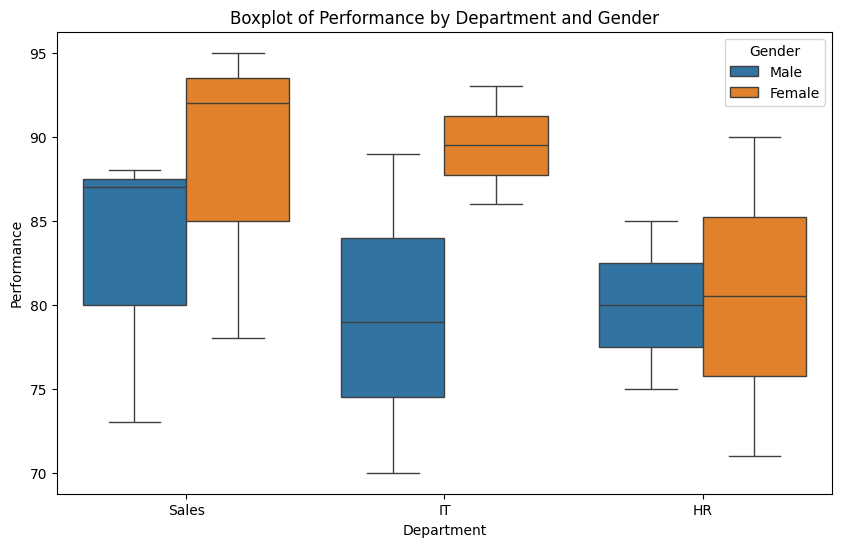

In [ ]:
#C√¢u 5
# V·∫Ω boxplot c·ªßa Performance theo Department v√† Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Performance", hue="Gender", data=df)
plt.title("Boxplot of Performance by Department and Gender")
plt.show()


X√°c ƒë·ªãnh outlier b·∫±ng IQR v√† ƒë·ªÅ xu·∫•t k·∫ø ho·∫°ch ph·ªèng v·∫•n:

IQR (Interquartile Range) gi√∫p x√°c ƒë·ªãnh c√°c ƒëi·ªÉm outlier. S·ª≠ d·ª•ng c√¥ng th·ª©c:

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 - Q1

Outliers n·∫±m ngo√†i ph·∫°m vi [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].

ƒê·ªÅ xu·∫•t k·∫ø ho·∫°ch ph·ªèng v·∫•n:

Ph·ªèng v·∫•n c√°c nh√¢n vi√™n outlier ƒë·ªÉ hi·ªÉu nguy√™n nh√¢n v√† c·∫£i thi·ªán hi·ªáu qu·∫£ l√†m vi·ªác.

K·∫ø ho·∫°ch n√†y gi√∫p n·∫Øm b·∫Øt c√°c v·∫•n ƒë·ªÅ c√° nh√¢n c·ªßa nh√¢n vi√™n v√† ƒë∆∞a ra gi·∫£i ph√°p c·ª• th·ªÉ, ƒë·ªìng th·ªùi c·∫£i thi·ªán qu·∫£n tr·ªã nh√¢n s·ª± b·∫±ng c√°ch gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ trong t·ª´ng tr∆∞·ªùng h·ª£p c·ª• th·ªÉ.

In [14]:
# C√¢u 6
# T·∫°o c·ªôt m·ªõi Efficiency = Performance / Hours_Worked
df['Efficiency'] = df['Performance'] / df['Hours_Worked']
# T√¨m nh√¢n vi√™n c√≥ Efficiency cao nh·∫•t
best_employee = df.loc[df['Efficiency'].idxmax()]
print(f"Nh√¢n vi√™n c√≥ Efficiency cao nh·∫•t: {best_employee['Employee_ID']}")



Nh√¢n vi√™n c√≥ Efficiency cao nh·∫•t: E009


ƒê·ªÅ xu·∫•t ph·∫ßn th∆∞·ªüng ho·∫∑c ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o:

Ph·∫ßn th∆∞·ªüng: T·∫∑ng th∆∞·ªüng cho nh√¢n vi√™n c√≥ hi·ªáu su·∫•t l√†m vi·ªác cao ƒë·ªÉ ƒë·ªông vi√™n h·ªç duy tr√¨ phong ƒë·ªô.

Ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o: T·∫°o c∆° h·ªôi cho nh√¢n vi√™n c√≥ Efficiency cao chia s·∫ª kinh nghi·ªám v√† k·ªπ nƒÉng v·ªõi c√°c ƒë·ªìng nghi·ªáp kh√°c.

Gi·∫£i th√≠ch t√°c ƒë·ªông: Ph·∫ßn th∆∞·ªüng v√† ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o s·∫Ω khuy·∫øn kh√≠ch nh√¢n vi√™n c·∫£i thi·ªán hi·ªáu su·∫•t v√† l√†m vi·ªác hi·ªáu qu·∫£ h∆°n.

In [15]:
# C√¢u 7
# ƒêi·ªÅn gi√° tr·ªã thi·∫øu b·∫±ng mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# T√≠nh t·ª∑ l·ªá nh√¢n vi√™n n·ªØ trong t·ª´ng Department
female_ratio = df[df['Gender'] == 'Female'].groupby('Department').size() / df.groupby('Department').size()
print(female_ratio)


Department
HR       0.500000
IT       0.571429
Sales    0.571429
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8864\2740605885.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


ƒê·ªÅ xu·∫•t ch√≠nh s√°ch ƒëa d·∫°ng gi·ªõi t√≠nh cho c√¥ng ty:

Ch√≠nh s√°ch: Khuy·∫øn kh√≠ch tuy·ªÉn d·ª•ng v√† thƒÉng ti·∫øn nh√¢n vi√™n n·ªØ, ƒë·∫∑c bi·ªát ·ªü c√°c ph√≤ng ban c√≥ t·ª∑ l·ªá th·∫•p.

T√°c ƒë·ªông: Ch√≠nh s√°ch n√†y gi√∫p t·∫°o ra m·ªôt m√¥i tr∆∞·ªùng l√†m vi·ªác ƒëa d·∫°ng, khuy·∫øn kh√≠ch s√°ng t·∫°o v√† ƒë·ªïi m·ªõi, ƒë·ªìng th·ªùi x√¢y d·ª±ng m·ªôt vƒÉn h√≥a t·ªï ch·ª©c c√¥ng b·∫±ng h∆°n.

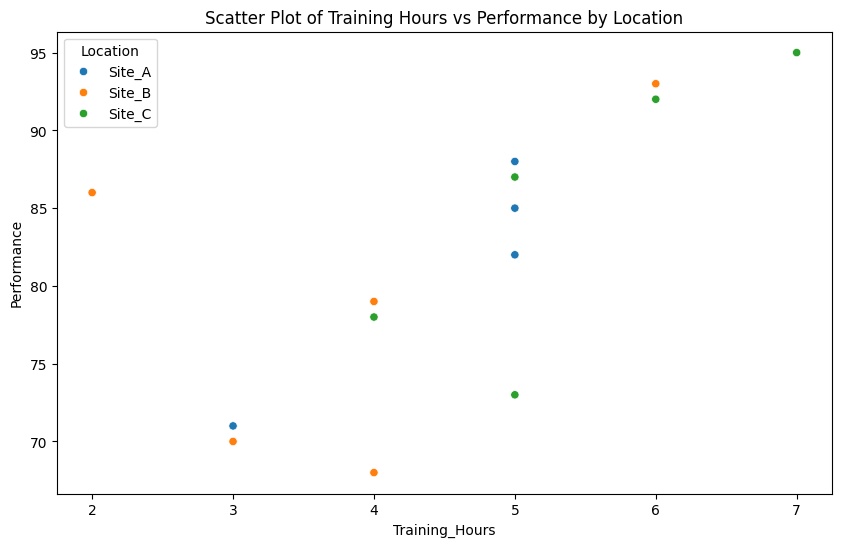

In [16]:
#C√¢u 8 
# V·∫Ω scatter plot gi·ªØa Training_Hours v√† Performance, t√¥ m√†u theo Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Training_Hours', y='Performance', hue='Location', data=df)
plt.title("Scatter Plot of Training Hours vs Performance by Location")
plt.show()


ƒê·ªÅ xu·∫•t k·∫ø ho·∫°ch ƒë√†o t·∫°o cho t·ª´ng Location:

Site_A: T·∫≠p trung v√†o ƒë√†o t·∫°o k·ªπ nƒÉng chuy√™n m√¥n.

Site_B: Cung c·∫•p kh√≥a h·ªçc ƒë√†o t·∫°o b·ªï sung cho nh·ªØng nh√¢n vi√™n c√≥ Performance th·∫•p.

Site_C: C·∫£i thi·ªán ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o hi·ªán t·∫°i ƒë·ªÉ t·ªëi ∆∞u h√≥a hi·ªáu su·∫•t.

Gi·∫£i th√≠ch: K·∫ø ho·∫°ch n√†y t·ªëi ∆∞u h√≥a hi·ªáu su·∫•t b·∫±ng c√°ch c√° nh√¢n h√≥a ch∆∞∆°ng tr√¨nh ƒë√†o t·∫°o cho t·ª´ng ƒë·ªãa ƒëi·ªÉm d·ª±a tr√™n nhu c·∫ßu v√† hi·ªáu qu·∫£ c√¥ng vi·ªác.


Department
HR       78.5
IT       79.0
Sales    83.0
Name: Performance, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8864\165703495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Performance'].fillna(df['Performance'].mode()[0], inplace=True)


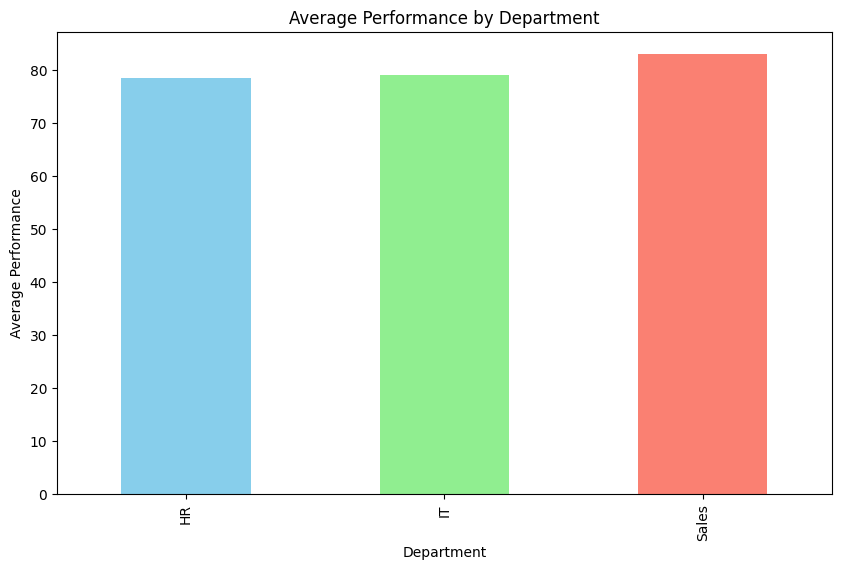

In [17]:
#C√¢u9
# ƒêi·ªÅn gi√° tr·ªã thi·∫øu trong Performance b·∫±ng mode
df['Performance'].fillna(df['Performance'].mode()[0], inplace=True)
# T√≠nh trung b√¨nh Performance c·ªßa t·ª´ng Department
avg_performance_by_dept = df.groupby('Department')['Performance'].mean()
print(avg_performance_by_dept)
# V·∫Ω bar chart so s√°nh
plt.figure(figsize=(10, 6))
avg_performance_by_dept.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Average Performance by Department")
plt.ylabel("Average Performance")
plt.show()


ƒê·ªÅ xu·∫•t chi·∫øn l∆∞·ª£c c·∫£i thi·ªán cho ph√≤ng ban c√≥ hi·ªáu su·∫•t th·∫•p nh·∫•t:

Sales (n·∫øu l√† ph√≤ng ban c√≥ hi·ªáu su·∫•t th·∫•p): Cung c·∫•p th√™m kh√≥a h·ªçc k·ªπ nƒÉng b√°n h√†ng v√† k·ªπ nƒÉng giao ti·∫øp cho nh√¢n vi√™n.

T√°c ƒë·ªông: C·∫£i thi·ªán nƒÉng l·ª±c b√°n h√†ng v√† k·ªπ nƒÉng giao ti·∫øp gi√∫p tƒÉng hi·ªáu su·∫•t c√¥ng vi·ªác cho ph√≤ng ban n√†y.

In [18]:
#C√¢u 10 
# T√¨m nh√¢n vi√™n c√≥ Hours_Worked d∆∞·ªõi 40 nh∆∞ng Performance tr√™n 85
top_performance_employees = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]
print(top_performance_employees)


  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Performance_DepartmentFilled  Performance_LocationFilled  \
8   Site_A                          90.0                        90.0   

   Efficiency  
8    2.432432  


ƒê·ªÅ xu·∫•t nghi√™n c·ª©u n·ªôi b·ªô:

Nghi√™n c·ª©u: ƒêi·ªÅu tra c√°c y·∫øu t·ªë nh∆∞ k·ªπ nƒÉng, c√¥ng c·ª• l√†m vi·ªác, v√† m√¥i tr∆∞·ªùng l√†m vi·ªác gi√∫p nh·ªØng nh√¢n vi√™n n√†y duy tr√¨ hi·ªáu su·∫•t cao.

Gi·∫£i th√≠ch: √Åp d·ª•ng k·∫øt qu·∫£ nghi√™n c·ª©u ƒë·ªÉ n√¢ng cao hi·ªáu qu·∫£ l√†m vi·ªác c·ªßa c√°c nh√¢n vi√™n kh√°c v√† t·ªëi ∆∞u h√≥a c√°c ƒëi·ªÅu ki·ªán l√†m vi·ªác trong c√¥ng ty.

In [ ]:
#C√¢u 11
from sklearn.linear_model import LinearRegression

# Ki·ªÉm tra n·∫øu c√≥ gi√° tr·ªã thi·∫øu trong 'Performance'
if df['Performance'].isna().sum() > 0:
    # X·ª≠ l√Ω gi√° tr·ªã thi·∫øu b·∫±ng h·ªìi quy tuy·∫øn t√≠nh
    df_train = df.dropna(subset=['Performance', 'Hours_Worked', 'Training_Hours'])
    X = df_train[['Hours_Worked', 'Training_Hours']]
    y = df_train['Performance']

    # H·ªìi quy tuy·∫øn t√≠nh
    model = LinearRegression()
    model.fit(X, y)

    # D·ª± ƒëo√°n gi√° tr·ªã thi·∫øu
    missing_data = df[df['Performance'].isna()]
    X_missing = missing_data[['Hours_Worked', 'Training_Hours']]
    
    if X_missing.shape[0] > 0:
        predicted_performance = model.predict(X_missing)
        df.loc[df['Performance'].isna(), 'Performance'] = predicted_performance
else:
    print("Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu trong c·ªôt 'Performance'")


Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu trong c·ªôt 'Performance'


So s√°nh ph∆∞∆°ng ph√°p trung b√¨nh v√† h·ªìi quy
1. Ph∆∞∆°ng ph√°p trung b√¨nh (Mean-based approach)
C√°ch th·ª±c hi·ªán: V·ªõi m·ªói ch·ªØ s·ªë trong t·∫≠p MNIST, t√≠nh to√°n trung b√¨nh c·ªßa t·∫•t c·∫£ c√°c ·∫£nh hu·∫•n luy·ªán c√≥ c√πng nh√£n ƒë·ªÉ t·∫°o ra m·ªôt "m·∫´u trung b√¨nh" ƒë·∫°i di·ªán.

D·ª± ƒëo√°n: Khi c√≥ m·ªôt ·∫£nh m·ªõi, ta t√≠nh kho·∫£ng c√°ch (v√≠ d·ª•: Euclidean Distance) gi·ªØa ·∫£nh ƒë√≥ v√† c√°c m·∫´u trung b√¨nh c·ªßa t·ª´ng l·ªõp, r·ªìi g√°n nh√£n theo l·ªõp c√≥ kho·∫£ng c√°ch nh·ªè nh·∫•t.

‚úÖ ∆Øu ƒëi·ªÉm:

ƒê∆°n gi·∫£n, nhanh, kh√¥ng c·∫ßn hu·∫•n luy·ªán m√¥ h√¨nh ph·ª©c t·∫°p.

Ho·∫°t ƒë·ªông kh√° t·ªët n·∫øu d·ªØ li·ªáu c√≥ √≠t bi·∫øn ƒë·ªông.

‚ùå Nh∆∞·ª£c ƒëi·ªÉm:

Kh√¥ng th·ªÉ m√¥ h√¨nh h√≥a c√°c bi·∫øn ƒë·ªïi phi tuy·∫øn t√≠nh trong d·ªØ li·ªáu.

D·ªÖ b·ªã ·∫£nh h∆∞·ªüng b·ªüi nhi·ªÖu ho·∫∑c m·∫´u ngo·∫°i lai.

Kh√¥ng t·∫≠n d·ª•ng ƒë∆∞·ª£c c√°c ƒë·∫∑c tr∆∞ng ph·ª©c t·∫°p trong ·∫£nh.

2. Ph∆∞∆°ng ph√°p h·ªìi quy (Regression-based approach)
S·ª≠ d·ª•ng m·ªôt m√¥ h√¨nh nh∆∞ h·ªìi quy logistic (Logistic Regression) ho·∫∑c m·∫°ng n∆°-ron nh√¢n t·∫°o (ANN) ƒë·ªÉ h·ªçc c√°ch ph√¢n lo·∫°i ch·ªØ s·ªë.

D·ª± ƒëo√°n: D·ª±a tr√™n tr·ªçng s·ªë ƒë∆∞·ª£c h·ªçc, m√¥ h√¨nh g√°n nh√£n b·∫±ng c√°ch t√≠nh x√°c su·∫•t m·ªói l·ªõp (v·ªõi Softmax) v√† ch·ªçn l·ªõp c√≥ x√°c su·∫•t cao nh·∫•t.

‚úÖ ∆Øu ƒëi·ªÉm:

Hi·ªáu su·∫•t cao h∆°n ph∆∞∆°ng ph√°p trung b√¨nh, ƒë·∫∑c bi·ªát khi d·ªØ li·ªáu c√≥ nhi·ªÅu bi·∫øn ƒë·ªông.

C√≥ th·ªÉ m·ªü r·ªông v√† t·ªëi ∆∞u b·∫±ng c√°ch s·ª≠ d·ª•ng m√¥ h√¨nh m·∫°nh h∆°n (CNN, ResNet).

‚ùå Nh∆∞·ª£c ƒëi·ªÉm:

C·∫ßn nhi·ªÅu d·ªØ li·ªáu hu·∫•n luy·ªán h∆°n.

Y√™u c·∫ßu t√†i nguy√™n t√≠nh to√°n l·ªõn h∆°n.



In [20]:
#C√¢u 12 
from scipy.stats import skew

# T√≠nh skewness c·ªßa Performance
performance_skewness = skew(df['Performance'].dropna())
print(f"Skewness c·ªßa Performance: {performance_skewness}")


Skewness c·ªßa Performance: -0.011426151108541883


Ph√¢n t√≠ch Skewness v√† ƒê·ªÅ xu·∫•t ƒêi·ªÅu Ch·ªânh C√°ch T√≠nh Performance
1. Hi·ªÉu v·ªÅ Skewness trong d·ªØ li·ªáu Performance
Skewness (ƒë·ªô l·ªách) ƒëo l∆∞·ªùng m·ª©c ƒë·ªô b·∫•t ƒë·ªëi x·ª©ng c·ªßa ph√¢n ph·ªëi d·ªØ li·ªáu.

Gi√° tr·ªã skewness = -0.0114 r·∫•t g·∫ßn 0, cho th·∫•y ph√¢n ph·ªëi Performance g·∫ßn nh∆∞ ƒë·ªëi x·ª©ng, t·ª©c l√† kh√¥ng c√≥ s·ª± ch√™nh l·ªách l·ªõn gi·ªØa nh√≥m nh√¢n vi√™n c√≥ hi·ªáu su·∫•t cao v√† th·∫•p.

Tuy nhi√™n, ƒëi·ªÅu n√†y kh√¥ng c√≥ nghƒ©a l√† h·ªá th·ªëng ƒë√°nh gi√° c√¥ng b·∫±ng, v√¨ c√≥ th·ªÉ v·∫´n c√≥ s·ª± b·∫•t h·ª£p l√Ω trong c√°ch ph√¢n b·ªï ƒëi·ªÉm s·ªë ho·∫∑c s·ª± thi√™n v·ªã do quy tr√¨nh ƒë√°nh gi√°.

2. V·∫•n ƒë·ªÅ ti·ªÅm ·∫©n trong h·ªá th·ªëng ƒë√°nh gi√° Performance hi·ªán t·∫°i
D√π skewness g·∫ßn b·∫±ng 0, v·∫´n c√≥ m·ªôt s·ªë v·∫•n ƒë·ªÅ c√≥ th·ªÉ x·∫£y ra:

Thi·∫øu s·ª± ph√¢n bi·ªát gi·ªØa nh√¢n vi√™n xu·∫•t s·∫Øc v√† nh√¢n vi√™n trung b√¨nh: N·∫øu ƒëi·ªÉm s·ªë t·∫≠p trung qu√° nhi·ªÅu v√†o m·ª©c trung b√¨nh, th√¨ nh√¢n vi√™n l√†m vi·ªác t·ªët nh·∫•t kh√¥ng ƒë∆∞·ª£c ghi nh·∫≠n x·ª©ng ƒë√°ng.

Ch∆∞a ph·∫£n √°nh ƒë√∫ng nƒÉng su·∫•t th·ª±c t·∫ø: N·∫øu h·ªá th·ªëng ƒë√°nh gi√° d·ª±a nhi·ªÅu v√†o c·∫£m t√≠nh c·ªßa ng∆∞·ªùi qu·∫£n l√Ω, c√≥ th·ªÉ x·∫£y ra thi√™n v·ªã (bias).

Ph√¢n ph·ªëi kh√¥ng c√¥ng b·∫±ng ph·∫ßn th∆∞·ªüng & c∆° h·ªôi thƒÉng ti·∫øn: N·∫øu t·∫•t c·∫£ nh√¢n vi√™n c√≥ ƒëi·ªÉm s·ªë t∆∞∆°ng ƒë·ªëi g·∫ßn nhau, th√¨ vi·ªác tƒÉng l∆∞∆°ng, thƒÉng ch·ª©c c√≥ th·ªÉ kh√¥ng ph·∫£n √°nh ƒë√∫ng nƒÉng l·ª±c th·ª±c s·ª±.

3. ƒê·ªÅ xu·∫•t ƒëi·ªÅu ch·ªânh c√°ch t√≠nh Performance ƒë·ªÉ c√¥ng b·∫±ng h∆°n
3.1. S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p ƒë√°nh gi√° theo ph√¢n v·ªã (Percentile-based Evaluation)
Thay v√¨ ch·ªâ s·ª≠ d·ª•ng ƒëi·ªÉm trung b√¨nh, ta c√≥ th·ªÉ x·∫øp h·∫°ng nh√¢n vi√™n theo ph·∫ßn trƒÉm v·ªã tr√≠ c·ªßa h·ªç trong to√†n b·ªô c√¥ng ty.

V√≠ d·ª•:

Top 10% nh√¢n vi√™n (hi·ªáu su·∫•t xu·∫•t s·∫Øc) ‚Üí C√≥ th·ªÉ nh·∫≠n ph·∫ßn th∆∞·ªüng ho·∫∑c thƒÉng ti·∫øn.

Ti·∫øp theo 40% (hi·ªáu su·∫•t t·ªët) ‚Üí ƒê∆∞·ª£c ghi nh·∫≠n nh∆∞ng ch∆∞a ƒë·∫øn m·ª©c thƒÉng ti·∫øn ngay.

D∆∞·ªõi 50% ‚Üí C·∫ßn xem x√©t ƒë√†o t·∫°o l·∫°i ho·∫∑c h·ªó tr·ª£ c·∫£i thi·ªán.

T√°c ƒë·ªông: C√°ch n√†y gi√∫p ƒë·∫£m b·∫£o r·∫±ng ch·ªâ nh·ªØng nh√¢n vi√™n th·ª±c s·ª± xu·∫•t s·∫Øc m·ªõi ƒë∆∞·ª£c th∆∞·ªüng, ƒë·ªìng th·ªùi c≈©ng h·ªó tr·ª£ nh·ªØng ng∆∞·ªùi c·∫ßn c·∫£i thi·ªán.

3.2. ƒêi·ªÅu ch·ªânh tr·ªçng s·ªë c√°c y·∫øu t·ªë ƒë√°nh gi√° Performance
Thay v√¨ ch·ªâ ƒë√°nh gi√° b·∫±ng KPI c·ª©ng nh·∫Øc, ta c√≥ th·ªÉ k·∫øt h·ª£p nhi·ªÅu ti√™u ch√≠:

70% d·ª±a v√†o hi·ªáu su·∫•t c√¥ng vi·ªác (KPI, s·ªë li·ªáu th·ª±c t·∫ø).

20% ƒë√°nh gi√° t·ª´ ƒë·ªìng nghi·ªáp (Peer Review) ƒë·ªÉ tr√°nh thi√™n v·ªã t·ª´ qu·∫£n l√Ω.

10% d·ª±a tr√™n s√°ng t·∫°o, ƒë√≥ng g√≥p √Ω t∆∞·ªüng, tinh th·∫ßn l√†m vi·ªác nh√≥m.

T√°c ƒë·ªông: C√°ch ti·∫øp c·∫≠n n√†y l√†m gi·∫£m ·∫£nh h∆∞·ªüng c·ªßa qu·∫£n l√Ω c√° nh√¢n v√† gi√∫p ƒë√°nh gi√° to√†n di·ªán h∆°n.

3.3. √Åp d·ª•ng h·ªá s·ªë ƒëi·ªÅu ch·ªânh theo c·∫•p b·∫≠c & ph√≤ng ban
M·ªôt s·ªë ph√≤ng ban c√≥ KPI d·ªÖ ƒë·∫°t h∆°n so v·ªõi c√°c nh√≥m kh√°c (VD: b·ªô ph·∫≠n kinh doanh c√≥ th·ªÉ ƒë·∫°t doanh s·ªë cao nh∆∞ng b·ªô ph·∫≠n IT kh√¥ng th·ªÉ c√≥ ch·ªâ s·ªë t∆∞∆°ng ƒë∆∞∆°ng).

Gi·∫£i ph√°p: √Åp d·ª•ng h·ªá s·ªë ƒëi·ªÅu ch·ªânh theo ƒë·∫∑c th√π c√¥ng vi·ªác ƒë·ªÉ ƒë·∫£m b·∫£o nh√¢n vi√™n trong c√°c b·ªô ph·∫≠n kh√°c nhau c√≥ c∆° h·ªôi c√¥ng b·∫±ng trong vi·ªác ƒë√°nh gi√°.

T√°c ƒë·ªông: Nh√¢n vi√™n ·ªü c√°c b·ªô ph·∫≠n kh√°c nhau ƒë∆∞·ª£c ƒë√°nh gi√° d·ª±a tr√™n ti√™u ch√≠ ph√π h·ª£p v·ªõi c√¥ng vi·ªác c·ªßa h·ªç.

3.4. K·∫øt h·ª£p Machine Learning ƒë·ªÉ gi·∫£m bias trong ƒë√°nh gi√°
S·ª≠ d·ª•ng thu·∫≠t to√°n ML ƒë·ªÉ ph√¢n t√≠ch d·ªØ li·ªáu hi·ªáu su·∫•t theo th·ªùi gian v√† ph√°t hi·ªán nh·ªØng ƒëi·ªÉm b·∫•t th∆∞·ªùng (v√≠ d·ª•: m·ªôt qu·∫£n l√Ω c√≥ xu h∆∞·ªõng ch·∫•m ƒëi·ªÉm th·∫•p h∆°n so v·ªõi c√°c qu·∫£n l√Ω kh√°c).

T√°c ƒë·ªông: Gi·∫£m thi·ªÉu y·∫øu t·ªë c·∫£m t√≠nh v√† thi√™n v·ªã trong ƒë√°nh gi√°.

4. T√°c ƒë·ªông c·ªßa vi·ªác ƒëi·ªÅu ch·ªânh ƒë·∫øn nh√¢n vi√™n
‚úÖ T√≠ch c·ª±c:

Nh√¢n vi√™n gi·ªèi th·ª±c s·ª± s·∫Ω ƒë∆∞·ª£c c√¥ng nh·∫≠n ƒë√∫ng m·ª©c.

Gi√∫p nh·ªØng ng∆∞·ªùi c√≥ ti·ªÅm nƒÉng nh∆∞ng ch∆∞a ph√°t huy h·∫øt kh·∫£ nƒÉng c√≥ c∆° h·ªôi c·∫£i thi·ªán.

Tr√°nh t√¨nh tr·∫°ng "c√†o b·∫±ng" gi·ªØa nh√¢n vi√™n chƒÉm ch·ªâ v√† nh√¢n vi√™n trung b√¨nh.

‚ùå Th√°ch th·ª©c:

C√≥ th·ªÉ g√¢y ra ph·∫£n ·ª©ng ti√™u c·ª±c t·ª´ nh·ªØng ng∆∞·ªùi quen v·ªõi h·ªá th·ªëng c≈©.

C·∫ßn c√≥ th·ªùi gian ƒë·ªÉ nh√¢n vi√™n v√† qu·∫£n l√Ω th√≠ch nghi v·ªõi c√°ch ƒë√°nh gi√° m·ªõi.

5. K·∫øt lu·∫≠n
H·ªá th·ªëng ƒë√°nh gi√° Performance c·∫ßn k·∫øt h·ª£p nhi·ªÅu ph∆∞∆°ng ph√°p ƒë·ªÉ ƒë·∫£m b·∫£o c√¥ng b·∫±ng v√† ch√≠nh x√°c h∆°n. Vi·ªác s·ª≠ d·ª•ng x·∫øp h·∫°ng theo ph√¢n v·ªã, ƒëi·ªÅu ch·ªânh tr·ªçng s·ªë, √°p d·ª•ng h·ªá s·ªë theo ng√†nh ngh·ªÅ v√† Machine Learning c√≥ th·ªÉ gi√∫p c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c c·ªßa ƒë√°nh gi√°, gi·∫£m thi√™n v·ªã, v√† t·∫°o ƒë·ªông l·ª±c t·ªët h∆°n cho nh√¢n vi√™n. üöÄ

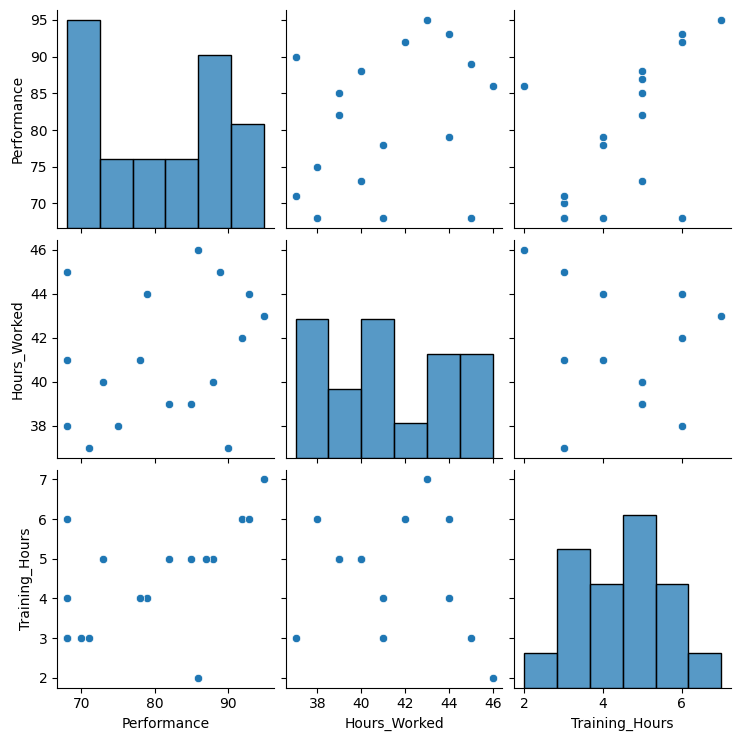

In [21]:
#C√¢u 13
# V·∫Ω pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.show()


ƒê·ªÅ xu·∫•t m√¥ h√¨nh ƒë√°nh gi√° hi·ªáu su·∫•t m·ªõi:

M√¥ h√¨nh: S·ª≠ d·ª•ng m·ªôt m√¥ h√¨nh t·ªïng h·ª£p, trong ƒë√≥ k·∫øt h·ª£p Performance, Hours_Worked v√† Training_Hours ƒë·ªÉ t√≠nh to√°n hi·ªáu su·∫•t.

Gi·∫£i th√≠ch: M√¥ h√¨nh n√†y ph·∫£n √°nh ƒë∆∞·ª£c m·ªëi quan h·ªá gi·ªØa c√°c y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu su·∫•t v√† gi√∫p c√¥ng ty ƒë√°nh gi√° nh√¢n vi√™n m·ªôt c√°ch ch√≠nh x√°c h∆°n.

Location
Site_A    0.571429
Site_B    0.428571
Site_C    0.500000
dtype: float64


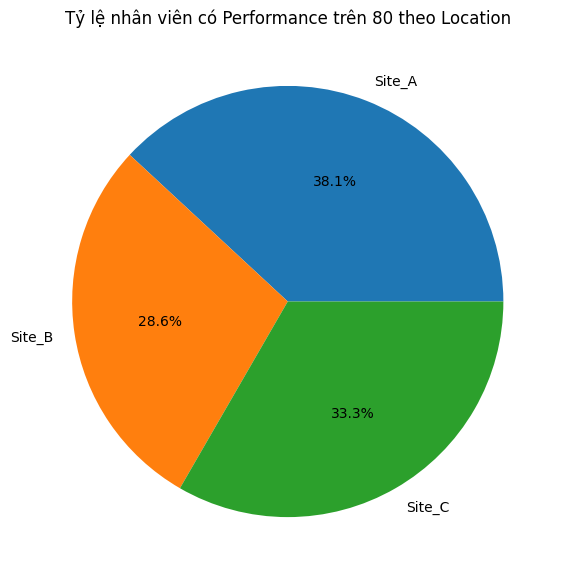

In [22]:
#C√¢u 14
# T√≠nh t·ª∑ l·ªá nh√¢n vi√™n c√≥ Performance tr√™n 80
performance_above_80 = df[df['Performance'] > 80].groupby('Location').size() / df.groupby('Location').size()
print(performance_above_80)


# V·∫Ω pie chart so s√°nh
performance_above_80.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title("T·ª∑ l·ªá nh√¢n vi√™n c√≥ Performance tr√™n 80 theo Location")
plt.show()


ƒê·ªÅ xu·∫•t chi·∫øn l∆∞·ª£c khen th∆∞·ªüng:

Site_A: Khen th∆∞·ªüng nh√¢n vi√™n c√≥ Performance cao ƒë·ªÉ gi·ªØ v·ªØng ƒë·ªông l·ª±c l√†m vi·ªác.

Site_B: C·∫£i thi·ªán ƒë√†o t·∫°o v√† ph√°t tri·ªÉn nh√¢n vi√™n c√≥ hi·ªáu su·∫•t th·∫•p h∆°n.

In [23]:
#C√¢u 15
# H√†m x√°c ƒë·ªãnh nh√¢n vi√™n c√≥ Performance ngo√†i 2 ƒë·ªô l·ªách chu·∫©n
def identify_outliers(df):
    std_performance = df['Performance'].std()
    mean_performance = df['Performance'].mean()
    return df[(df['Performance'] < mean_performance - 2*std_performance) | (df['Performance'] > mean_performance + 2*std_performance)]

# √Åp d·ª•ng h√†m
outliers = identify_outliers(df)
print(outliers)


Empty DataFrame
Columns: [Employee_ID, Department, Performance, Hours_Worked, Training_Hours, Gender, Location, Performance_DepartmentFilled, Performance_LocationFilled, Efficiency]
Index: []


ƒê·ªÅ xu·∫•t quy tr√¨nh ƒë√°nh gi√° l·∫°i hi·ªáu su·∫•t:

Quy tr√¨nh ƒë√°nh gi√°: Ph√¢n t√≠ch k·ªπ h∆°n c√°c nh√¢n vi√™n ngo√†i 2 ƒë·ªô l·ªách chu·∫©n, t√¨m hi·ªÉu nguy√™n nh√¢n c·ªßa hi·ªáu su·∫•t cao ho·∫∑c th·∫•p b·∫•t th∆∞·ªùng.

Gi·∫£i th√≠ch: Quy tr√¨nh n√†y gi√∫p ƒë·∫£m b·∫£o ƒë√°nh gi√° c√¥ng b·∫±ng v√† tr√°nh thi√™n v·ªã, ƒë·ªìng th·ªùi gi√∫p qu·∫£n l√Ω nh√¢n s·ª± ƒë∆∞a ra quy·∫øt ƒë·ªãnh t·ªët h∆°n.

C√¢u h·ªèi ANN 

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:40<00:00, 244695.53it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 102350.32it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:09<00:00, 183206.25it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 4192457.92it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



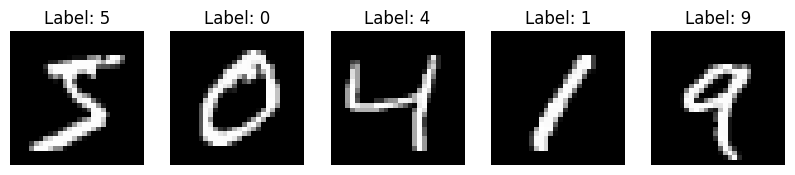

In [25]:
#C√¢u 16 
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ƒê·ªãnh nghƒ©a ph√©p bi·∫øn ƒë·ªïi: chuy·ªÉn ƒë·ªïi ·∫£nh th√†nh tensor, chu·∫©n h√≥a v·ªÅ [0,1], v√† flatten
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuy·ªÉn th√†nh tensor
    transforms.Normalize((0.5,), (0.5,)),  # Chu·∫©n h√≥a v·ªÅ [-1,1] (ho·∫∑c c√≥ th·ªÉ ƒë·ªÉ (0,1))
    transforms.Lambda(lambda x: x.view(-1))  # Flatten th√†nh vector 784 chi·ªÅu
])

# T·∫£i dataset MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# L·∫•y 5 m·∫´u ·∫£nh ƒë·∫ßu ti√™n
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    img, label = train_dataset[i]
    axes[i].imshow(img.view(28,28), cmap='gray')  # Chuy·ªÉn l·∫°i v·ªÅ ma tr·∫≠n 28x28 ƒë·ªÉ hi·ªÉn th·ªã
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()



Tr·ª±c quan h√≥a kh√°c
D√πng PCA (Principal Component Analysis) ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng 2D v√† v·∫Ω ƒëi·ªÉm d·ªØ li·ªáu.

D√πng T-SNE ƒë·ªÉ xem c√°c ch·ªØ s·ªë c√≥ ph√¢n t√°ch r√µ r√†ng kh√¥ng.

In [31]:
#C√¢u 17 
from torch.utils.data import DataLoader, random_split

# Chia train set th√†nh 80% train, 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# T·∫°o DataLoader
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Chi·∫øn l∆∞·ª£c ch·ªçn batch size
Batch size l·ªõn (128, 256, 512)

∆Øu ƒëi·ªÉm: T·∫≠n d·ª•ng GPU t·ªët h∆°n, t·ªëc ƒë·ªô hu·∫•n luy·ªán nhanh h∆°n.

Nh∆∞·ª£c ƒëi·ªÉm: S·ª≠ d·ª•ng nhi·ªÅu RAM GPU, c√≥ th·ªÉ d·∫´n ƒë·∫øn m·∫•t th√¥ng tin do t√≠nh t·ªïng qu√°t k√©m h∆°n.

Batch size nh·ªè (32, 16)

∆Øu ƒëi·ªÉm: T·ªëi ∆∞u h√≥a t·ªïng qu√°t h√≥a, gi·∫£m overfitting.

Nh∆∞·ª£c ƒëi·ªÉm: Hu·∫•n luy·ªán ch·∫≠m h∆°n.

üî• G·ª£i √Ω: N·∫øu c√≥ GPU m·∫°nh, batch size 256 l√† l·ª±a ch·ªçn t·ªët. N·∫øu d√πng CPU, batch size 64 h·ª£p l√Ω.

In [27]:
#C√¢u 18 
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# ƒê·ªãnh nghƒ©a ki·∫øn tr√∫c ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Kh·ªüi t·∫°o m√¥ h√¨nh, loss, optimizer
model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, verbose=True)

# Hu·∫•n luy·ªán v·ªõi early stopping
epochs = 20
patience = 5
best_val_loss = float('inf')
counter = 0
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    # Early stopping
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/20, Train Loss: 0.4987, Val Loss: 0.2702
Epoch 2/20, Train Loss: 0.2371, Val Loss: 0.1829
Epoch 3/20, Train Loss: 0.1732, Val Loss: 0.1358
Epoch 4/20, Train Loss: 0.1374, Val Loss: 0.1577
Epoch 5/20, Train Loss: 0.1189, Val Loss: 0.1194
Epoch 6/20, Train Loss: 0.1011, Val Loss: 0.1047
Epoch 7/20, Train Loss: 0.0906, Val Loss: 0.1140
Epoch 8/20, Train Loss: 0.0818, Val Loss: 0.0993
Epoch 9/20, Train Loss: 0.0733, Val Loss: 0.1110
Epoch 10/20, Train Loss: 0.0674, Val Loss: 0.0957
Epoch 11/20, Train Loss: 0.0619, Val Loss: 0.1138
Epoch 12/20, Train Loss: 0.0583, Val Loss: 0.1150
Epoch 13/20, Train Loss: 0.0529, Val Loss: 0.1079
Epoch 14/20, Train Loss: 0.0491, Val Loss: 0.0937
Epoch 15/20, Train Loss: 0.0448, Val Loss: 0.1162
Epoch 16/20, Train Loss: 0.0460, Val Loss: 0.0999
Epoch 17/20, Train Loss: 0.0432, Val Loss: 0.0949
Epoch 18/20, Train Loss: 0.0377, Val Loss: 0.1129
Epoch 19/20, Train Loss: 0.0391, Val Loss: 0.0944
Early stopping triggered.


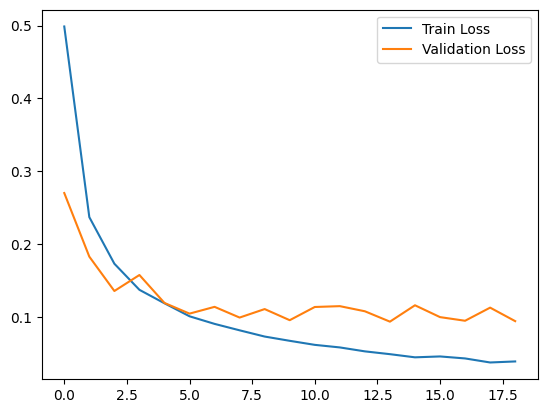

In [28]:
#C√¢u 18 Bi·ªÉu ƒë·ªì loss 
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.show()

Ki·∫øn tr√∫c ANN kh√°c
TƒÉng s·ªë neuron/t·∫ßng ·∫©n (V√≠ d·ª•: 256 ‚Üí 128 ‚Üí 64 ‚Üí 10)

Th√™m Batch Normalization ƒë·ªÉ ·ªïn ƒë·ªãnh qu√° tr√¨nh hu·∫•n luy·ªán

S·ª≠ d·ª•ng Dropout ƒë·ªÉ gi·∫£m overfitting

Test Accuracy: 97.48%


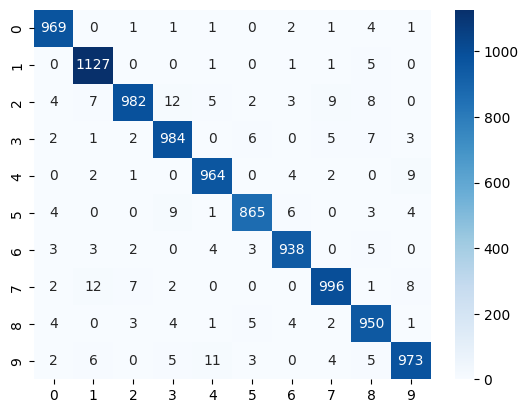

In [30]:
# C√¢u 19
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# D·ª± ƒëo√°n tr√™n t·∫≠p test
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.numpy())
        y_true.extend(targets.numpy())

# ƒê√°nh gi√° accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


C·∫£i thi·ªán n·∫øu accuracy < 95%
TƒÉng s·ªë t·∫ßng ho·∫∑c s·ªë neuron

D√πng augmentation (bi·∫øn ƒë·ªïi d·ªØ li·ªáu)

D√πng m√¥ h√¨nh CNN thay v√¨ ANN 
ƒê√°nh gi√° m√¥ h√¨nh

1. Accuracy l√† g√¨?
Accuracy = (S·ªë d·ª± ƒëo√°n ƒë√∫ng) / (T·ªïng s·ªë m·∫´u)

N·∫øu accuracy < 95%, c·∫ßn c·∫£i thi·ªán m√¥ h√¨nh.

2. Confusion Matrix
Hi·ªÉn th·ªã s·ªë l·∫ßn d·ª± ƒëo√°n nh·∫ßm gi·ªØa c√°c ch·ªØ s·ªë.

V√≠ d·ª•:

Ch·ªØ "3" th∆∞·ªùng b·ªã nh·∫ßm v·ªõi "8" do n√©t cong t∆∞∆°ng t·ª±.

Ch·ªØ "1" d·ªÖ b·ªã nh·∫ßm v·ªõi "7".

3. C√°ch c·∫£i thi·ªán n·∫øu accuracy < 95%
D√πng augmentation: Th√™m nhi·ªÖu, xoay ·∫£nh, l√†m bi·∫øn d·∫°ng nh·∫π ƒë·ªÉ gi√∫p m√¥ h√¨nh h·ªçc t·ªët h∆°n.

Th·ª≠ m√¥ h√¨nh CNN thay v√¨ ANN: CNN th∆∞·ªùng m·∫°nh h∆°n v·ªõi d·ªØ li·ªáu ·∫£nh.

TƒÉng s·ªë neurons ho·∫∑c t·∫ßng ·∫©n: ƒê·ªÉ m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c nhi·ªÅu ƒë·∫∑c tr∆∞ng h∆°n.

